<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Including the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Importing the California House Price Dataset**

In [2]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [3]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
#loading the dataset to a pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data,  columns = house_price_dataset.feature_names)

In [5]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [7]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
#checking the number of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

In [9]:
# check for missing values
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [10]:
#statistical measures of the datatset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Understanding the correlation between the various features in the datatset**

1. **Positive Correlation**
2. **Negative Correlation**

In [11]:
correlation = house_price_dataframe.corr()

<Axes: >

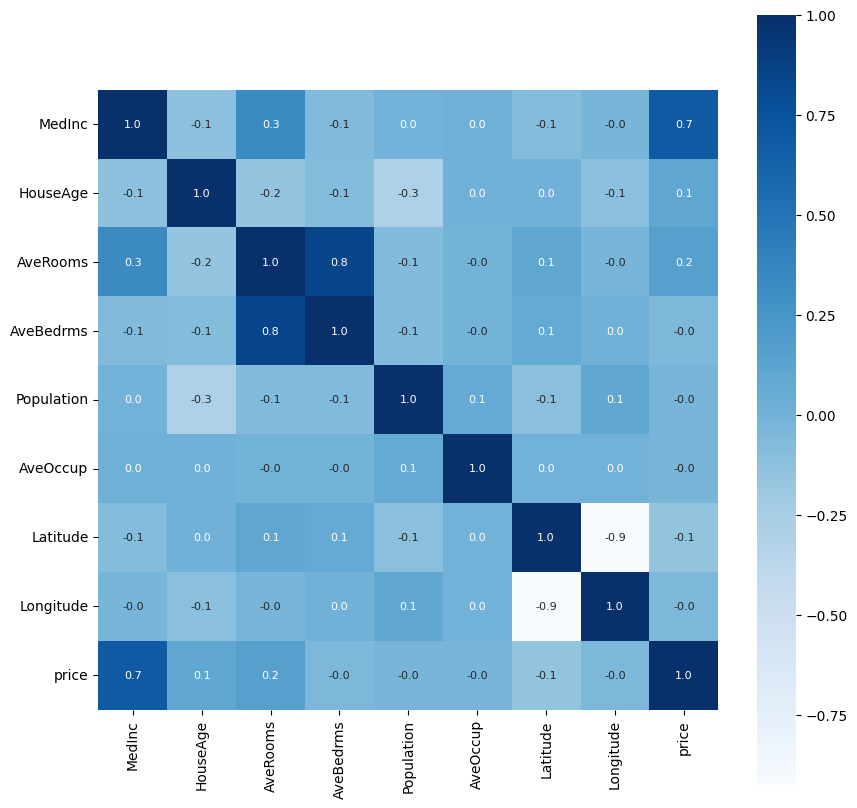

In [12]:
# constructing a heat map to understand the correlation
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')

**Splitting the data and Target**

In [13]:
X = house_price_dataframe.drop(['price'], axis = 1)
Y = house_price_dataframe['price']

In [14]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting the data into Training and Test Data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


**Model Training - XGBoost Regressor**

In [17]:
# loading the model
model = XGBRegressor()

In [18]:
#training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

**Evaluation**

**Prediction on training data**

In [19]:
#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [20]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [21]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [22]:
print("R squared error : ", score_1)
print("Mean absolute error : ", score_2)

R squared error :  0.943650140819218
Mean absolute error :  0.1933648700612105


**Visualizing the actual prices and predicted prices**

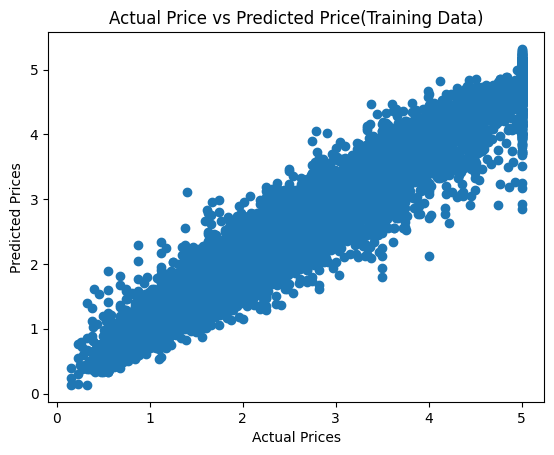

In [40]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price(Training Data)")
plt.show()

**Prediction on Test Data**

In [24]:
#accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print("Mean absolute error : ", score_2)

R squared error :  0.8338000331788725
Mean absolute error :  0.3108631800268186


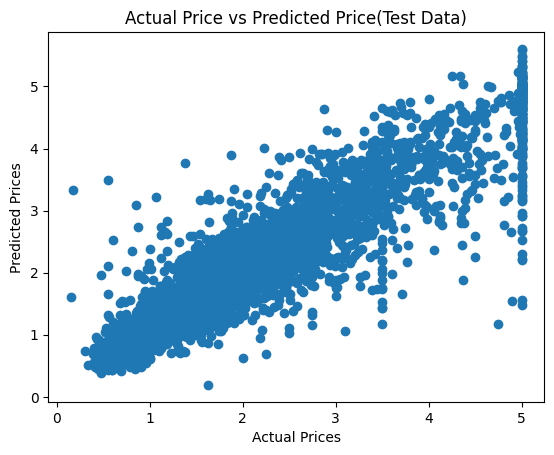

In [33]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price(Test Data)")
plt.show()

**Trying to improve the accuracy of the model and reduce overfitting**

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [26]:
# Initialize the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=2)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=2), param_grid=param_grid, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

In [27]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MAE found: ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best negative MAE found:  -0.29504483490390887


In [28]:
# Train the model with the best parameters
best_model = XGBRegressor(**grid_search.best_params_, random_state=2)
best_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
# Evaluate the best model on the training data
training_data_prediction_tuned = best_model.predict(X_train)
score_1_train_tuned = metrics.r2_score(Y_train, training_data_prediction_tuned)
score_2_train_tuned = metrics.mean_absolute_error(Y_train, training_data_prediction_tuned)

print("\nR squared error (tuned model - training data): ", score_1_train_tuned)
print("Mean absolute error (tuned model - training data): ", score_2_train_tuned)

# Evaluate the best model on the test data
test_data_prediction_tuned = best_model.predict(X_test)
score_1_test_tuned = metrics.r2_score(Y_test, test_data_prediction_tuned)
score_2_test_tuned = metrics.mean_absolute_error(Y_test, test_data_prediction_tuned)

print("R squared error (tuned model - test data): ", score_1_test_tuned)
print("Mean absolute error (tuned model - test data): ", score_2_test_tuned)


R squared error (tuned model - training data):  0.9711683145777006
Mean absolute error (tuned model - training data):  0.1383163579614437
R squared error (tuned model - test data):  0.8482574598235516
Mean absolute error (tuned model - test data):  0.29356067477649495


**Plotting to see the difference before and after tuning**

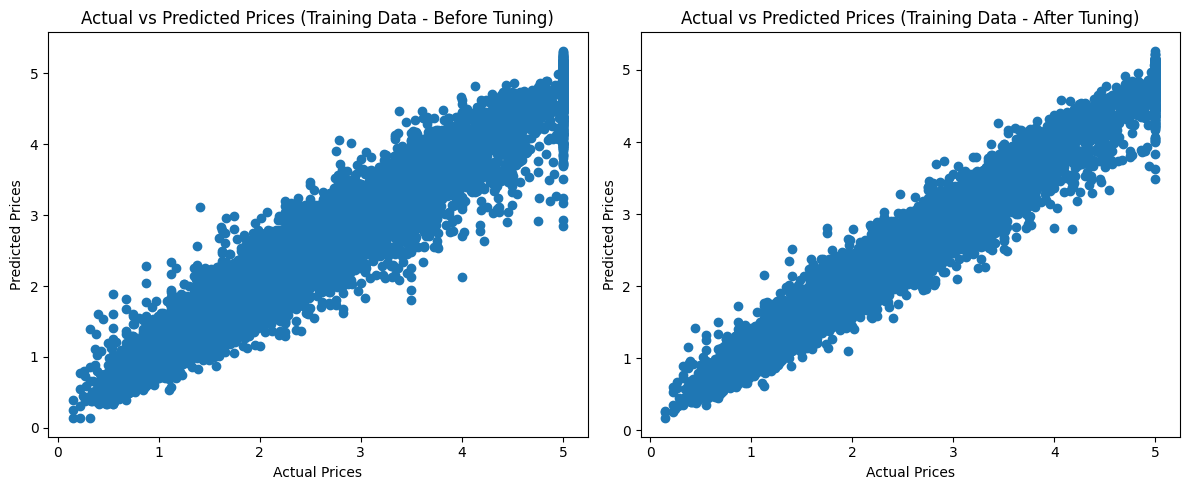

In [41]:
# Plot actual vs predicted prices for training data before and after tuning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Training Data - Before Tuning)")

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.scatter(Y_train, training_data_prediction_tuned)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Training Data - After Tuning)")

plt.tight_layout() # Adjust layout to prevent titles overlapping
plt.show()

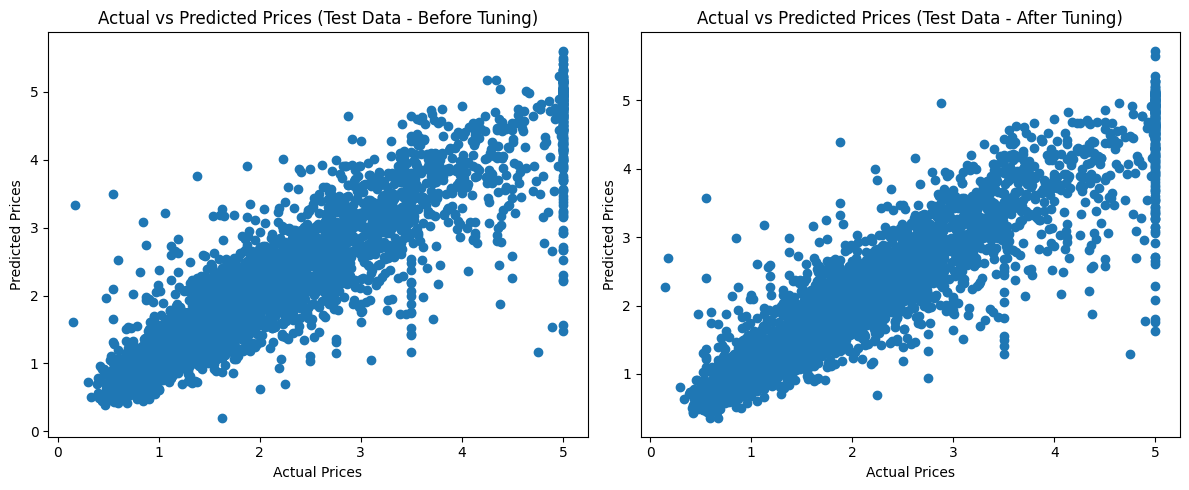

In [42]:
# Plot actual vs predicted prices for test data before and after tuning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Test Data - Before Tuning)")

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.scatter(Y_test, test_data_prediction_tuned)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Test Data - After Tuning)")

plt.tight_layout() # Adjust layout to prevent titles overlapping
plt.show()

**Checking Accuracy of other Regressor algorithms**

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Initialize different regression models
linear_reg_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
decision_tree_model = DecisionTreeRegressor(random_state=2)

# Train the models
linear_reg_model.fit(X_train, Y_train)
ridge_model.fit(X_train, Y_train)
lasso_model.fit(X_train, Y_train)
decision_tree_model.fit(X_train, Y_train)

# Make predictions on the test data
linear_reg_pred = linear_reg_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)

# Evaluate the models
print("--- Linear Regression ---")
print("R squared error:", r2_score(Y_test, linear_reg_pred))
print("Mean absolute error:", mean_absolute_error(Y_test, linear_reg_pred))

print("\n--- Ridge Regression ---")
print("R squared error:", r2_score(Y_test, ridge_pred))
print("Mean absolute error:", mean_absolute_error(Y_test, ridge_pred))

print("\n--- Lasso Regression ---")
print("R squared error:", r2_score(Y_test, lasso_pred))
print("Mean absolute error:", mean_absolute_error(Y_test, lasso_pred))

print("\n--- Decision Tree Regression ---")
print("R squared error:", r2_score(Y_test, decision_tree_pred))
print("Mean absolute error:", mean_absolute_error(Y_test, decision_tree_pred))

--- Linear Regression ---
R squared error: 0.6013853272055152
Mean absolute error: 0.5358292549657769

--- Ridge Regression ---
R squared error: 0.6013790960754168
Mean absolute error: 0.5358410021212333

--- Lasso Regression ---
R squared error: 0.28240409692932456
Mean absolute error: 0.7696399476608766

--- Decision Tree Regression ---
R squared error: 0.5820252320057087
Mean absolute error: 0.4722947456395349
